<a name='8'></a>
# Wheather monitoring 
Original dataset can be downloaded [here](https://www.kaggle.com/muthuj7/weather-dataset) or access on `./data/weatherHistory.csv`

In [43]:
#!gdown --id 10Fxd8W6IlCVBCC6ZyeOO3gKk15zDfn8h
!pip install -U scikit-learn
!unzip ../data/archive.zip -d ../data/
!echo "Ready"

Archive:  ../data/archive.zip
replace ../data/weatherHistory.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split


In [4]:
df = pd.read_csv("../data/weatherHistory.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature (C),96453.0,11.932678,9.551546,-21.822222,4.688889,12.0000,18.838889,39.905556
Apparent Temperature (C),96453.0,10.855029,10.696847,-27.716667,2.311111,12.0000,18.838889,39.344444
Humidity,96453.0,0.734899,0.195473,0.000000,0.600000,0.7800,0.890000,1.000000
Wind Speed (km/h),96453.0,10.810640,6.913571,0.000000,5.828200,9.9659,14.135800,63.852600
Wind Bearing (degrees),96453.0,187.509232,107.383428,0.000000,116.000000,180.0000,290.000000,359.000000
Visibility (km),96453.0,10.347325,4.192123,0.000000,8.339800,10.0464,14.812000,16.100000
Loud Cover,96453.0,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
Pressure (millibars),96453.0,1003.235956,116.969906,0.000000,1011.900000,1016.4500,1021.090000,1046.380000


In [6]:
df.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [7]:
df.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [8]:
df['Precip Type'].value_counts()

rain    85224
snow    10712
Name: Precip Type, dtype: int64

In [9]:
df['Precip Type'].fillna(method='ffill',inplace=True,axis=0)
df['Precip Type'].value_counts()

#with droping
df.drop('Precip Type',axis=1,inplace=True)

In [10]:
target_values=df['Summary'].value_counts().index
target_values

Index(['Partly Cloudy', 'Mostly Cloudy', 'Overcast', 'Clear', 'Foggy',
       'Breezy and Overcast', 'Breezy and Mostly Cloudy',
       'Breezy and Partly Cloudy', 'Dry and Partly Cloudy',
       'Windy and Partly Cloudy', 'Light Rain', 'Breezy', 'Windy and Overcast',
       'Humid and Mostly Cloudy', 'Drizzle', 'Breezy and Foggy',
       'Windy and Mostly Cloudy', 'Dry', 'Humid and Partly Cloudy',
       'Dry and Mostly Cloudy', 'Rain', 'Windy', 'Humid and Overcast',
       'Windy and Foggy', 'Windy and Dry',
       'Dangerously Windy and Partly Cloudy', 'Breezy and Dry'],
      dtype='object')

In [11]:
le=LabelEncoder()
df['Summary']=le.fit_transform(df['Summary'])

print("There are {} classes.".format(len(np.unique(df["Summary"]))))

There are 27 classes.


In [12]:
df.head(5)

,Formatted Date,Summary,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,19,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,19,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,17,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,19,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,17,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [13]:
df.columns

Index(['Formatted Date', 'Summary', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [14]:
y=df['Summary']
x=df[['Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)',
       'Pressure (millibars)']]

In [15]:
x.corr()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
Temperature (C),1.000000,0.992629,-0.632255,0.008957,0.029988,0.392847,-0.005447
Apparent Temperature (C),0.992629,1.000000,-0.602571,-0.056650,0.029031,0.381718,-0.000219
Humidity,-0.632255,-0.602571,1.000000,-0.224951,0.000735,-0.369173,0.005454
Wind Speed (km/h),0.008957,-0.056650,-0.224951,1.000000,0.103822,0.100749,-0.049263
Wind Bearing (degrees),0.029988,0.029031,0.000735,0.103822,1.000000,0.047594,-0.011651
Visibility (km),0.392847,0.381718,-0.369173,0.100749,0.047594,1.000000,0.059818
Pressure (millibars),-0.005447,-0.000219,0.005454,-0.049263,-0.011651,0.059818,1.000000


In [16]:
x.drop('Apparent Temperature (C)',axis=1,inplace=True)
x.shape

/home/sebasmos/.local/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


(96453, 6)

In [17]:
x.head(10)

,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,9.472222,0.89,14.1197,251.0,15.8263,1015.13
1,9.355556,0.86,14.2646,259.0,15.8263,1015.63
2,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,8.288889,0.83,14.1036,269.0,15.8263,1016.41
4,8.755556,0.83,11.0446,259.0,15.8263,1016.51
5,9.222222,0.85,13.9587,258.0,14.9569,1016.66
6,7.733333,0.95,12.3648,259.0,9.9820,1016.72
7,8.772222,0.89,14.1519,260.0,9.9820,1016.84
8,10.822222,0.82,11.3183,259.0,9.9820,1017.37
9,13.772222,0.72,12.5258,279.0,9.9820,1017.22


In [18]:
y.unique()

array([19, 17, 18, 12,  3,  6,  5,  4, 13, 15, 23, 25,  2, 26,  0, 11, 24,
        7,  9, 21, 14, 16,  8, 22, 10,  1, 20])

<AxesSubplot:xlabel='Summary', ylabel='Count'>

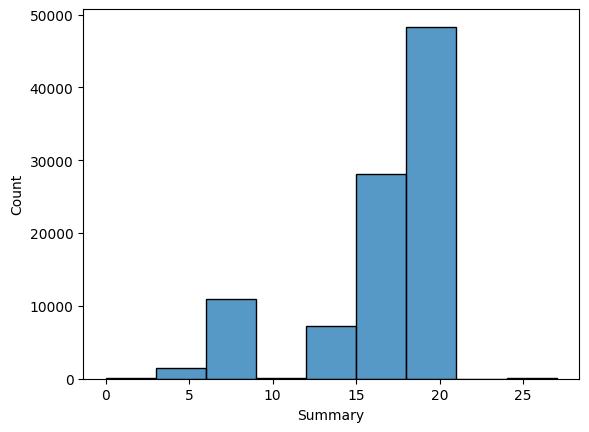

In [19]:
sns.histplot(y, binwidth=3, bins=len(y.unique()))

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

print("Training instances   {}, Training features   {}".format(x_train.shape[0], x_train.shape[1]))
print("Testing instances    {}, Testing features    {}".format(x_test.shape[0], x_test.shape[1]))

Training instances   77162, Training features   6
Testing instances    19291, Testing features    6


In [21]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [22]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(max_depth=32,n_estimators=120,random_state=1)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

In [23]:
from sklearn import metrics

metrics.accuracy_score(y_test,y_pred)

0.5874241874449225